In [1]:
import numpy as np
import os
import extract_lego_networks as eln
import networkx as nx

In [2]:
# Get ldr files
ldr_files = []
root_path = '/Users/glover.co/Documents/laszlo/NetDesign/data/lego/mepnet_data/'
classics = 'classics_lpub3d/'
architecture = 'architecture_lpub3d/'
synthetic = 'synthetic_test_lpub3d/'
dirs = [classics, architecture, synthetic]
names = []
for d in dirs:
    # Get model dirs
    model_dirs = os.listdir(root_path + d)
    for model in model_dirs:
        if model == '.DS_Store':
            continue
        # Get ldr files
        ldr_files.append(root_path + d + model + '/model.ldr')
        names.append(d[:-1] + '_' + model)

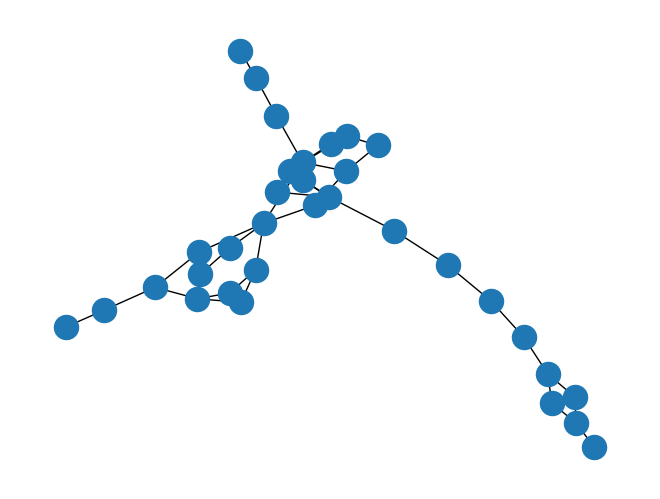

In [5]:
g, X = eln.create_lego_network(ldr_files[17])
nx.draw(g)

In [6]:
graph_root = '/Users/glover.co/Documents/laszlo/NetDesign/data/lego/networks/'
for name, file in zip(names,ldr_files):
    g, X = eln.create_lego_network(file)
    nx.write_edgelist(g, graph_root + 'g_' + name + '.txt')
    np.savetxt(graph_root + 'X_' + name + '.txt', X)

In [8]:
g = nx.read_edgelist(graph_root + 'g_classics_lpub3d_000012.txt')

In [20]:
g.nodes(data=True)

NodeDataView({0: {}, 3: {}, 4: {}, 1: {}, 5: {}, 2: {}, 6: {}, 7: {}, 9: {}, 10: {}, 11: {}, 8: {}, 13: {}, 16: {}, 12: {}, 14: {}, 15: {}, 17: {}, 18: {}, 19: {}, 20: {}, 21: {}, 22: {}, 23: {}})